<a href="https://colab.research.google.com/github/Ramjeet-Dixit/IITM-AIML-Rdixit/blob/main/LDA_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fisher Discriminant Analysis – (Using scikit-learn)
This notebook demonstrates how to apply Fisher Discriminant Analysis using `sklearn`'s `LinearDiscriminantAnalysis`.

**What problem does it solve?**

You have labeled data and want to:

Classify new points, or

Reduce dimensions while keeping classes well separated

Example:

Given measurements of flowers, predict which species they belong to.

**Core idea (intuition)**

LDA:

Finds a line (or plane) that best separates different classes

Projects data so that:

Points from the same class are close

Points from different classes are far apart

Think of it as:

“Rotate and squash the data so class separation is maximized.”

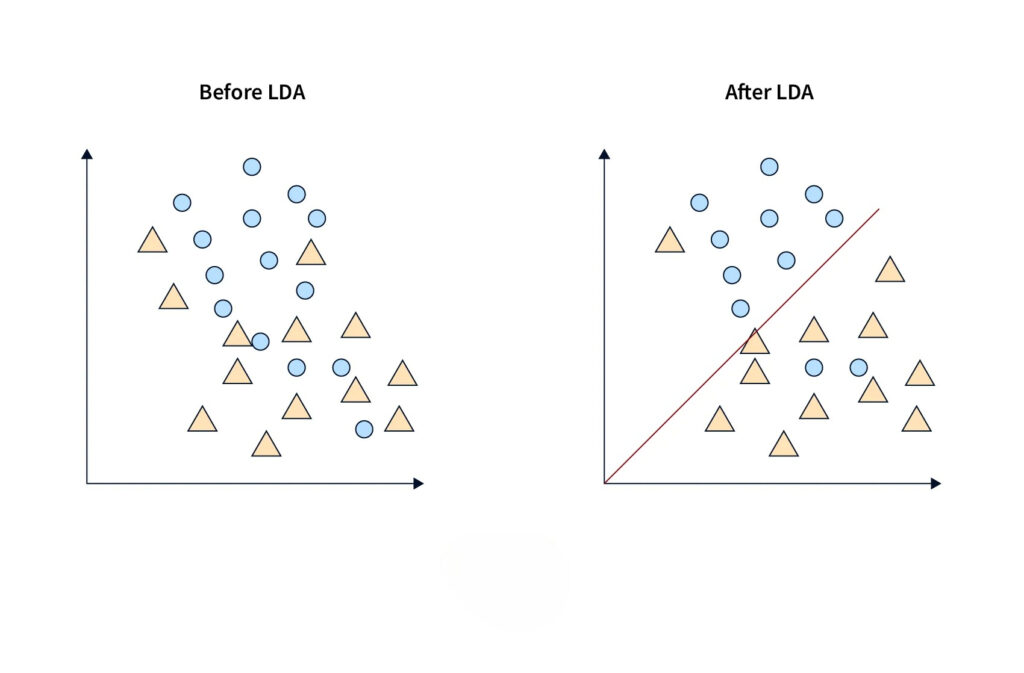

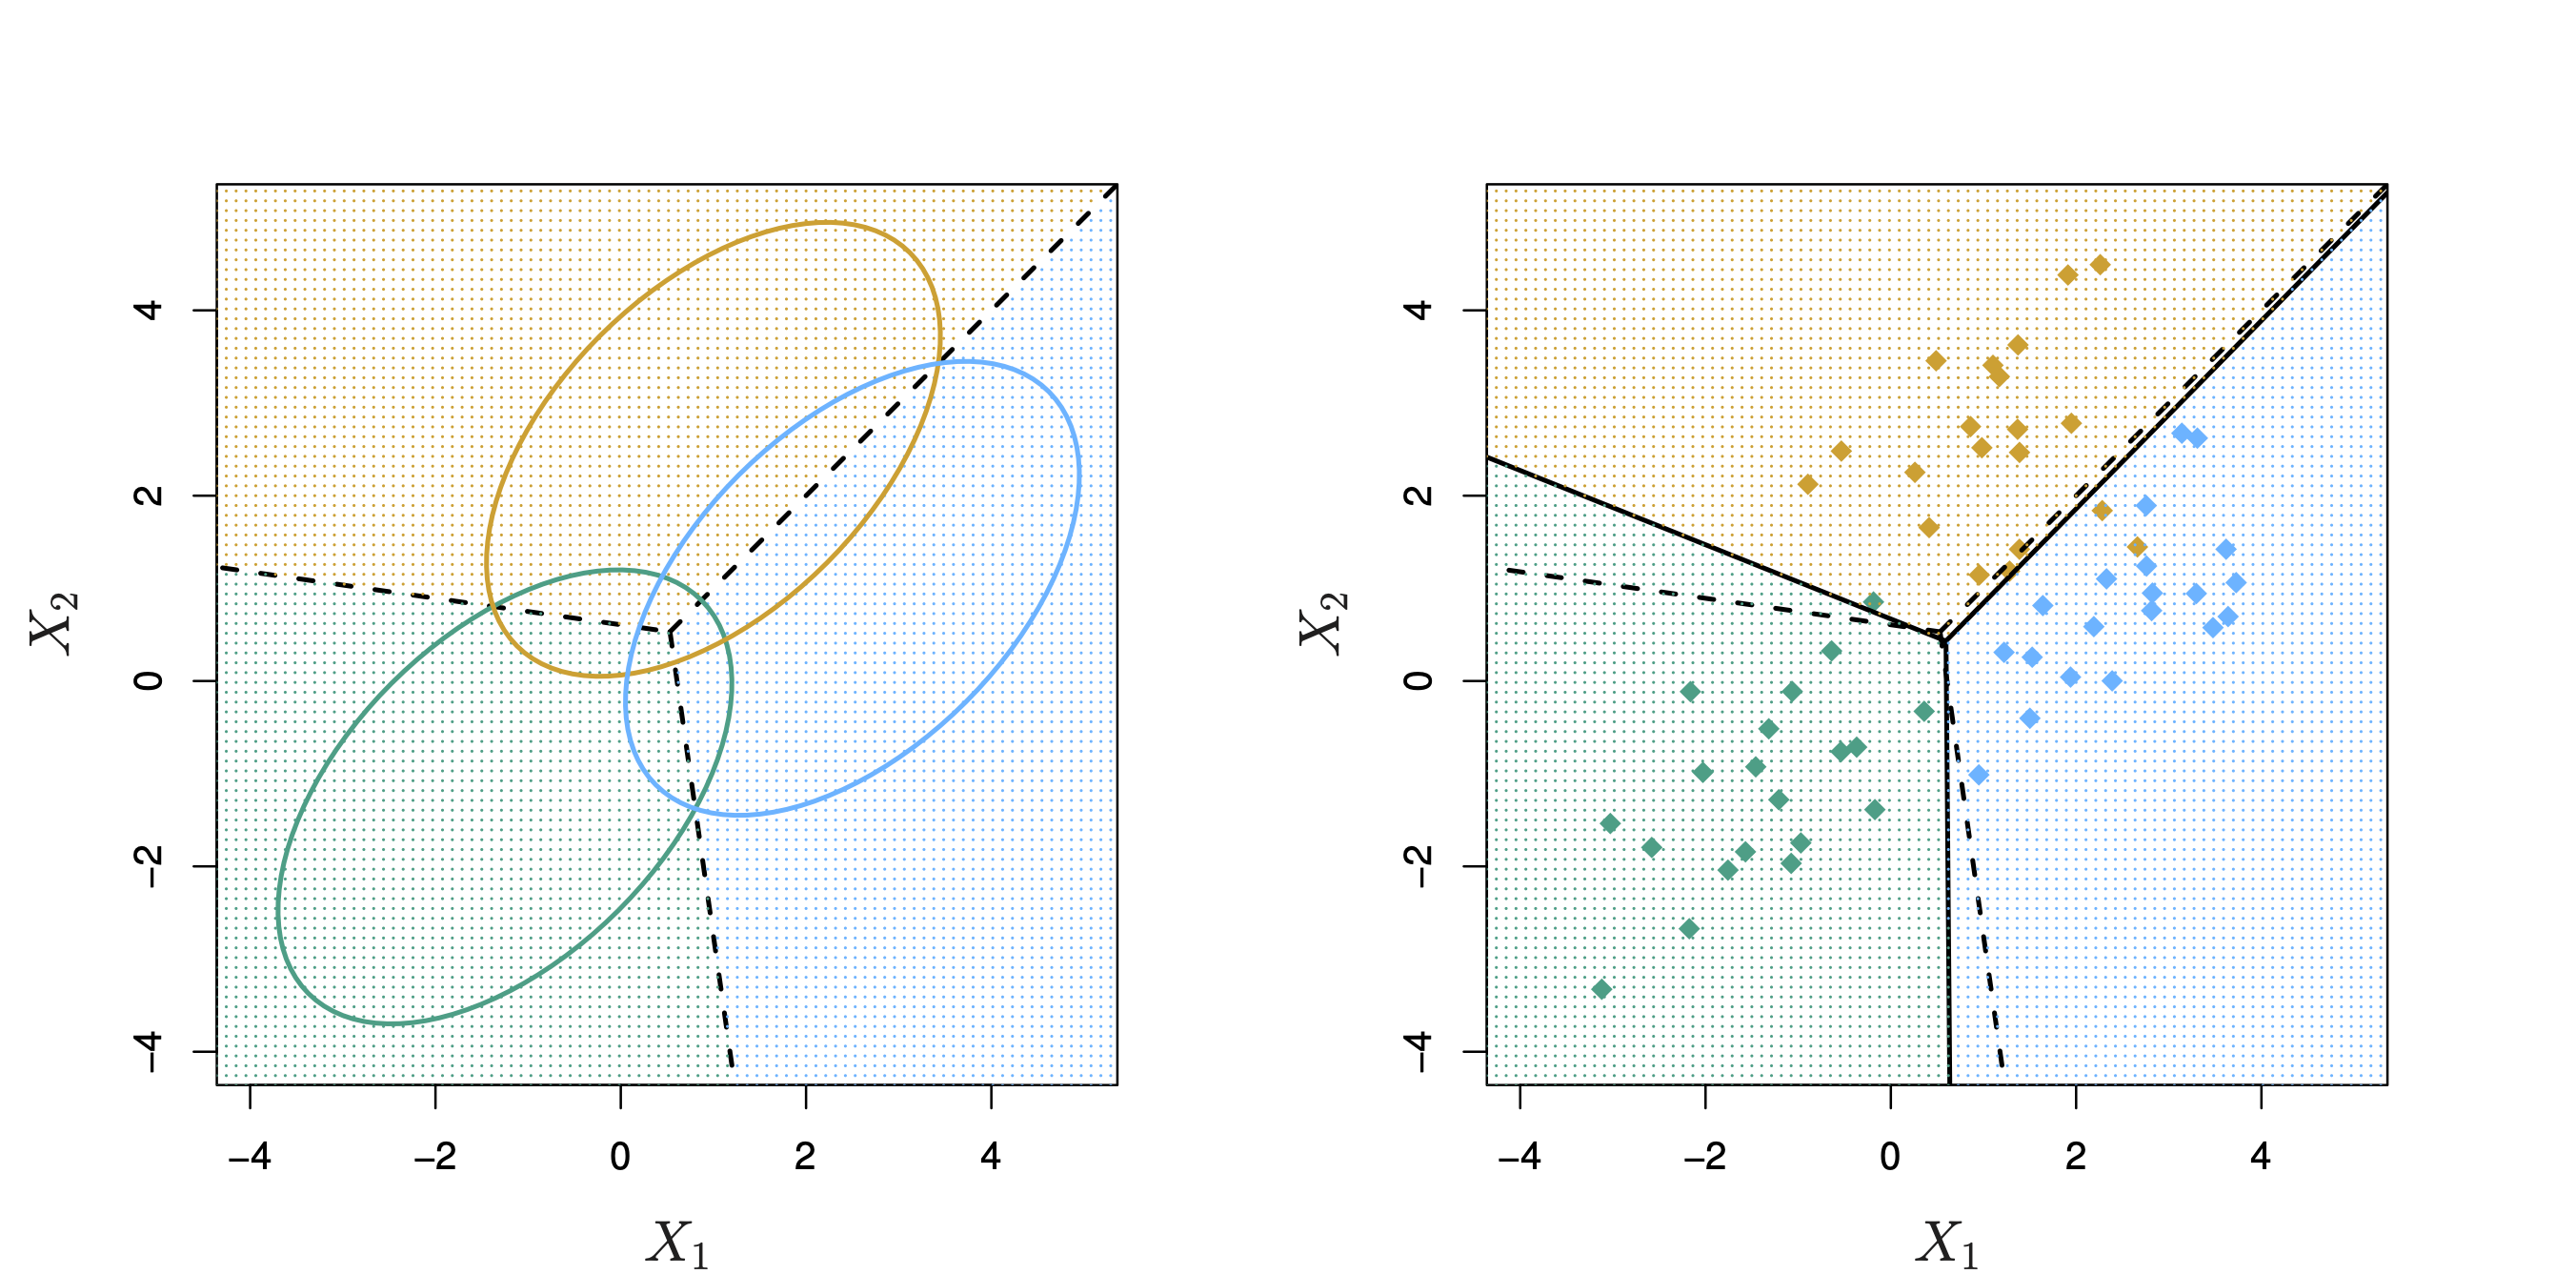

**How it works (high level)**

Compute:

Mean of each class

Variance within classes

Find a projection that:

Maximizes between-class variance

Minimizes within-class variance

Classify based on distance after projection

Applications

Face recognition

Medical diagnosis

Credit risk classification

Any small-to-medium structured dataset with labels

| Feature      | LDA              | PCA                   |
| ------------ | ---------------- | --------------------- |
| Supervised?  | ✅ Yes            | ❌ No                  |
| Uses labels? | Yes              | No                    |
| Goal         | Class separation | Variance preservation |


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

sns.set(style="whitegrid")

## Load and Inspect the Iris Dataset

In [2]:
iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Apply LDA to Reduce Dimensions and Visualize

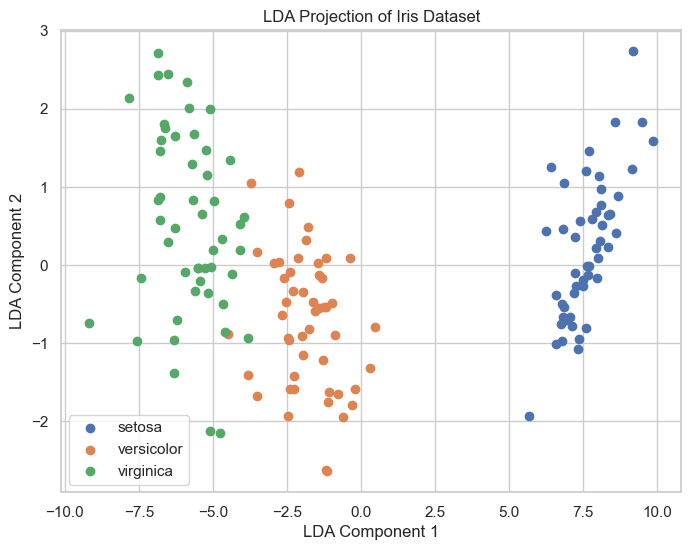

In [3]:
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

plt.figure(figsize=(8,6))
for label in np.unique(y):
    plt.scatter(X_lda[y == label, 0], X_lda[y == label, 1], label=iris.target_names[label])
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Projection of Iris Dataset')
plt.legend()
plt.show()

## Classification: LDA as Preprocessing + Logistic Regression

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.3, random_state=42)

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print("Confusion Matrix:Train")
print(confusion_matrix(y_train, y_train_pred))
print("\nClassification Report:Train")
print(classification_report(y_train, y_train_pred))

print("Confusion Matrix:Test")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:Test")
print(classification_report(y_test, y_test_pred))

Confusion Matrix:Train
[[31  0  0]
 [ 0 35  2]
 [ 0  1 36]]

Classification Report:Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.97      0.95      0.96        37
           2       0.95      0.97      0.96        37

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105

Confusion Matrix:Test
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:Test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

